In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.impute import SimpleImputer


In [3]:
# --- Method A: create Mall_Customers.csv with pandas ---
import pandas as pd, os

data = {
    "CustomerID": list(range(1, 21)),
    "Gender": ["Male", "Female"] * 10,
    "Age": [19,21,20,23,31,35,40,29,30,42,36,28,33,38,45,50,39,23,27,41],
    "AnnualIncome": [15,16,17,18,19,20,21,22,23,24,25,30,35,40,45,50,55,60,65,70],
    "SpendingScore": [39,81,6,77,40,76,6,94,3,72,14,99,15,77,13,79,35,66,50,90]
}

df_sample = pd.DataFrame(data)
df_sample.to_csv("Mall_Customers.csv", index=False)

print("Mall_Customers.csv created in this folder ✅")
print("Current folder:", os.getcwd())
print("Files here:", os.listdir()[:30])  # show first 30 files


Mall_Customers.csv created in this folder ✅
Current folder: c:\Users\ASUS\OneDrive\Desktop\New folder
Files here: ['Mall_Customers.csv']


In [4]:
# Show first 10 rows
print(df.head(10))

# Shape of the dataset (rows, columns)
print("\nDataset Shape:", df.shape)

# Summary info
print("\nDataset Info:")
print(df.info())

# Basic statistics (mean, min, max, etc.)
print("\nSummary Statistics:")
print(df.describe())


NameError: name 'df' is not defined

In [5]:
import pandas as pd

# Load CSV into df
df = pd.read_csv("Mall_Customers.csv")

# Check first 5 rows
print(df.head())


   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2  Female   21            16             81
2           3    Male   20            17              6
3           4  Female   23            18             77
4           5    Male   31            19             40


In [6]:
# Show first 10 rows
print(df.head(10))

# Shape of the dataset (rows, columns)
print("\nDataset Shape:", df.shape)

# Summary info
print("\nDataset Info:")
print(df.info())

# Basic statistics
print("\nSummary Statistics:")
print(df.describe())


   CustomerID  Gender  Age  AnnualIncome  SpendingScore
0           1    Male   19            15             39
1           2  Female   21            16             81
2           3    Male   20            17              6
3           4  Female   23            18             77
4           5    Male   31            19             40
5           6  Female   35            20             76
6           7    Male   40            21              6
7           8  Female   29            22             94
8           9    Male   30            23              3
9          10  Female   42            24             72

Dataset Shape: (20, 5)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     20 non-null     int64 
 1   Gender         20 non-null     object
 2   Age            20 non-null     int64 
 3   AnnualIncome   20 non-n

In [8]:
# Select the columns for clustering
X = df[['Annual Income ', 'Spending Score']]

print("Selected Features:")
print(X.head())


KeyError: "None of [Index(['Annual Income ', 'Spending Score'], dtype='object')] are in the [columns]"

In [9]:
print("Column names in your dataset:")
print(df.columns)


Column names in your dataset:
Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')


In [10]:
# Select the columns for clustering
X = df[['AnnualIncome', 'SpendingScore']]

print("Selected Features:")
print(X.head())


Selected Features:
   AnnualIncome  SpendingScore
0            15             39
1            16             81
2            17              6
3            18             77
4            19             40


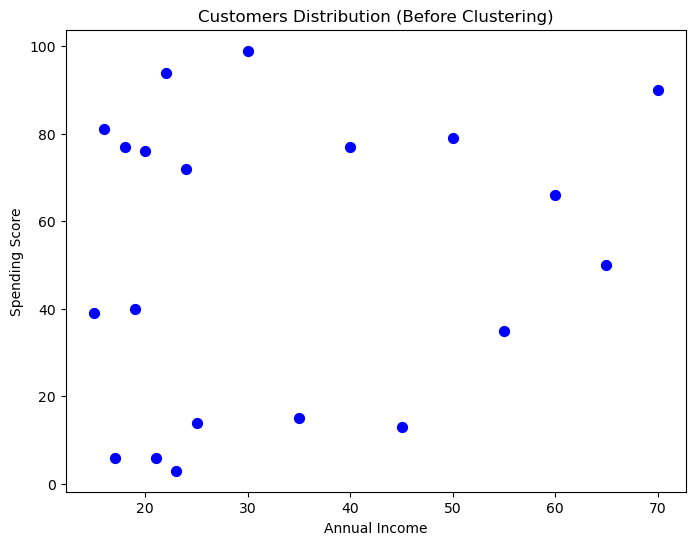

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X['AnnualIncome'], X['SpendingScore'], c='blue', s=50)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customers Distribution (Before Clustering)")
plt.show()


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

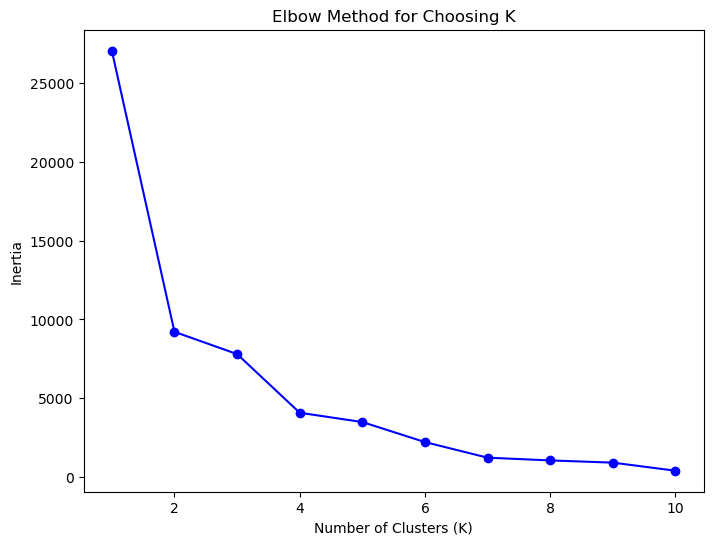

In [12]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)  # test K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Choosing K")
plt.show()


In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
df['Cluster'] = y_kmeans

print(df.head())


   CustomerID  Gender  Age  AnnualIncome  SpendingScore  Cluster
0           1    Male   19            15             39        2
1           2  Female   21            16             81        4
2           3    Male   20            17              6        1
3           4  Female   23            18             77        4
4           5    Male   31            19             40        2


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


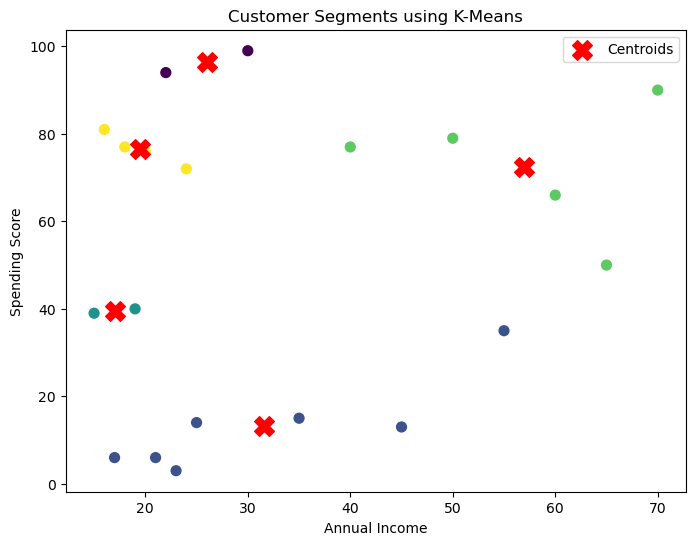

In [14]:
plt.figure(figsize=(8,6))

# Scatter plot of clusters
plt.scatter(X['AnnualIncome'], X['SpendingScore'], 
            c=y_kmeans, cmap='viridis', s=50)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], 
            c='red', marker='X', s=200, label='Centroids')

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments using K-Means")
plt.legend()
plt.show()


In [15]:
print(df['Cluster'].value_counts())


Cluster
1    7
3    5
4    4
2    2
0    2
Name: count, dtype: int64


In [16]:
cluster_summary = df.groupby('Cluster')[['AnnualIncome','SpendingScore','Age']].mean()
print(cluster_summary)


         AnnualIncome  SpendingScore        Age
Cluster                                        
0           26.000000      96.500000  28.500000
1           31.571429      13.142857  34.714286
2           17.000000      39.500000  25.000000
3           57.000000      72.400000  35.800000
4           19.500000      76.500000  30.250000
